In [1]:
from models.TernausNet import *

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [9]:
loaded_model = loaded_model = tf.keras.models.load_model('saved_models/TernausNet_run_2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})


In [3]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[0:200, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[0:200, :, :, :]


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [6]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(120, 512, 512, 1) (120, 512, 512, 5)


In [4]:
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5,learning_rate = 2e-4)

In [5]:
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 128 73856       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [6]:
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
60/60 [==============================] - 419s 7s/step - loss: 35.7983 - dice_coef_multilabel: 0.0081 - iou_multilabel: 0.0041 - val_loss: 2.0022 - val_dice_coef_multilabel: 0.0194 - val_iou_multilabel: 0.0101
INFO:tensorflow:Assets written to: saved_models/TernausNet_model/assets
Epoch 2/20
60/60 [==============================] - 395s 7s/step - loss: 1.5284 - dice_coef_multilabel: 0.0337 - iou_multilabel: 0.0182 - val_loss: 1.1035 - val_dice_coef_multilabel: 0.0819 - val_iou_multilabel: 0.0466
INFO:tensorflow:Assets written to: saved_models/TernausNet_model/assets
Epoch 3/20
60/60 [==============================] - 459s 8s/step - loss: 1.0003 - dice_coef_multilabel: 0.1120 - iou_multilabel: 0.0669 - val_loss: 0.9370 - val_dice_coef_multilabel: 0.1085 - val_iou_multilabel: 0.0652
INFO:tensorflow:Assets written to: saved_models/TernausNet_model/assets
Epoch 4/20
60/60 [==============================] - 516s 9s/step - loss: 0.8489 - dice_coef_multilabel: 0.1298 - iou_multilabe

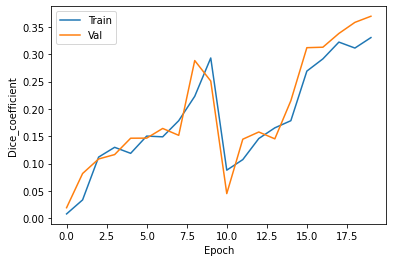

In [7]:
plot_dice(history)

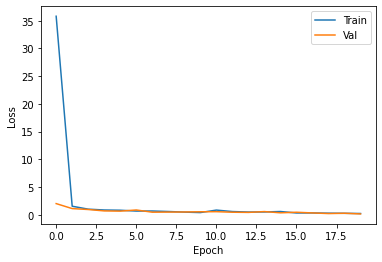

In [8]:
plot_loss(history)

In [9]:
preds = seg_model.predict(x_test)

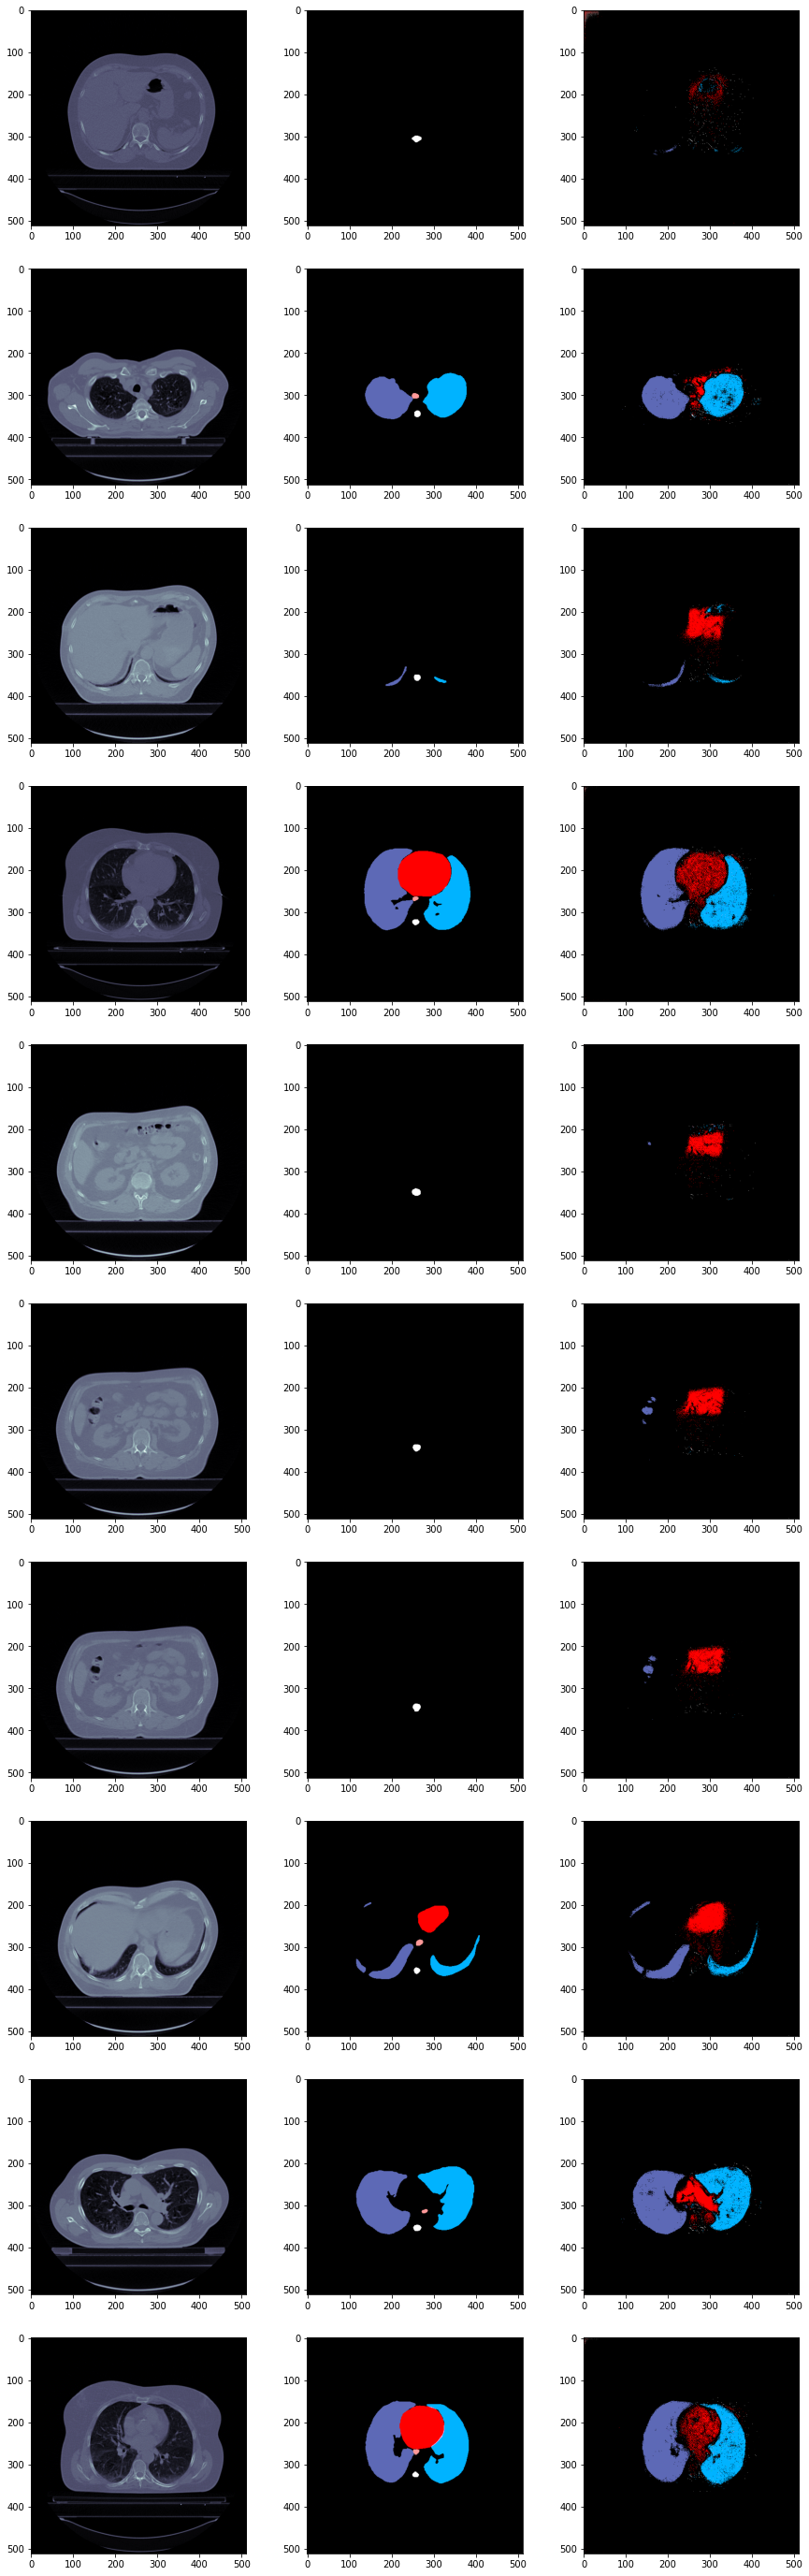

In [10]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [11]:
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.4842474
TEST IoU:  0.42358428


In [10]:
#LOADING DATA FOR NEXT TRAINING
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[200:400, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[200:400, :, :, :]

x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

In [3]:
loaded_model = tf.keras.models.load_model('saved_models/TernausNet_model', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, loaded_model = loaded_model, path = "saved_models/TernausNet_run_2",learning_rate = 2e-4)

history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
40/40 [==============================] - 318s 8s/step - loss: 0.7802 - dice_coef_multilabel: 0.1465 - iou_multilabel: 0.1079 - val_loss: 0.3484 - val_dice_coef_multilabel: 0.1999 - val_iou_multilabel: 0.1605
INFO:tensorflow:Assets written to: saved_models/TernausNet_run_2/assets
Epoch 2/20
40/40 [==============================] - 325s 8s/step - loss: 0.4478 - dice_coef_multilabel: 0.1846 - iou_multilabel: 0.1409 - val_loss: 0.3300 - val_dice_coef_multilabel: 0.2233 - val_iou_multilabel: 0.1896
INFO:tensorflow:Assets written to: saved_models/TernausNet_run_2/assets
Epoch 3/20
40/40 [==============================] - 288s 7s/step - loss: 0.1974 - dice_coef_multilabel: 0.2562 - iou_multilabel: 0.2200 - val_loss: 0.1166 - val_dice_coef_multilabel: 0.2787 - val_iou_multilabel: 0.2374
INFO:tensorflow:Assets written to: saved_models/TernausNet_run_2/assets
Epoch 4/20
40/40 [==============================] - 290s 7s/step - loss: 0.1722 - dice_coef_multilabel: 0.2478 - iou_multilabel

In [14]:
preds = seg_model.predict(x_test)

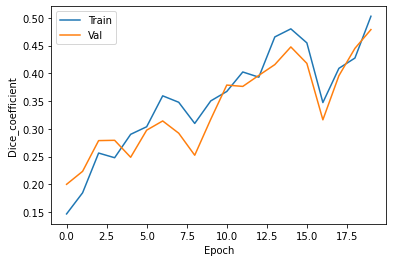

In [5]:
plot_dice(history)

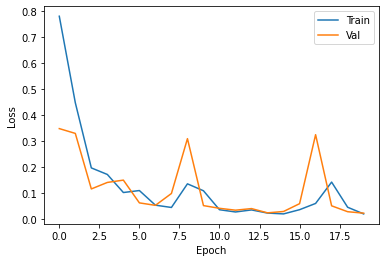

In [6]:
plot_loss(history)

In [15]:
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.75109255
TEST IoU:  0.6803137


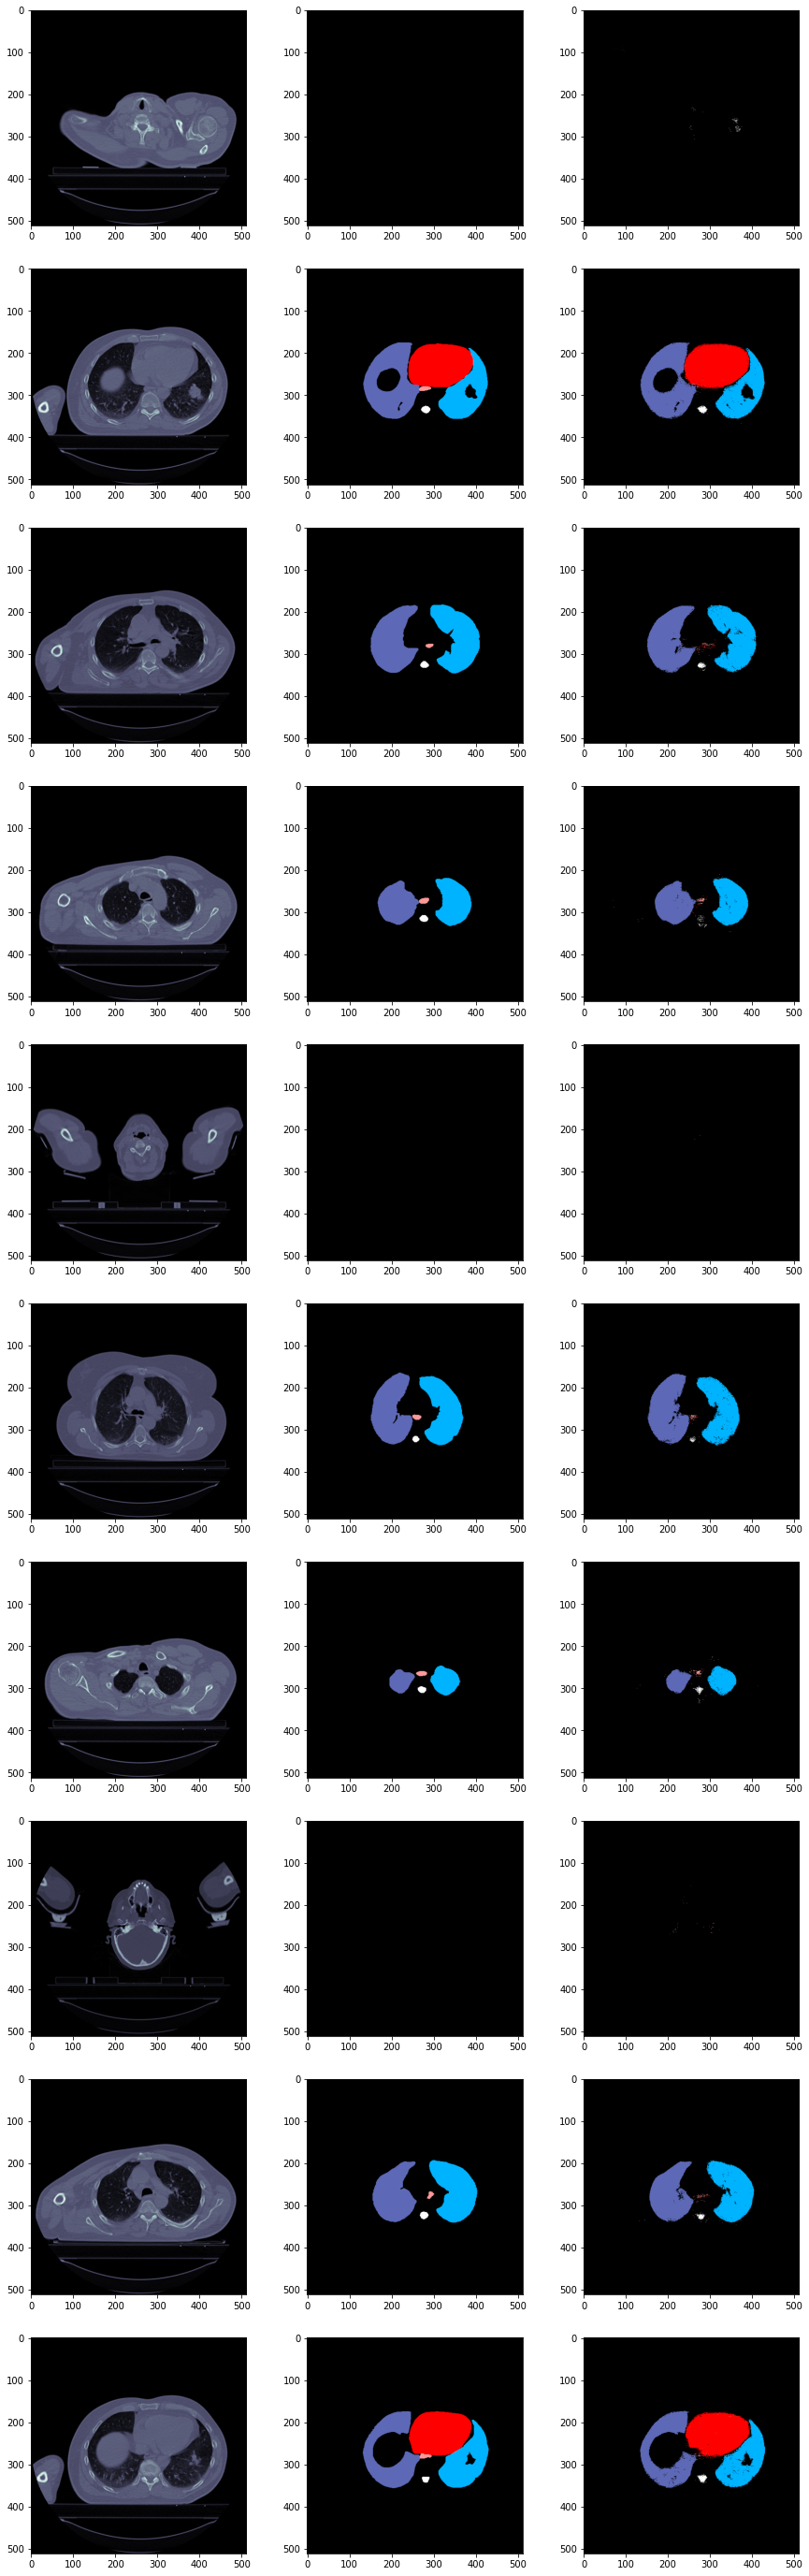

In [7]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [ ]:
#LOADING DATA FOR 3 TRAINING
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[400:600, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[400:600, :, :, :]

x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]
loaded_model = tf.keras.models.load_model('saved_models/TernausNet_run_2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, loaded_model = loaded_model, path = "saved_models/TernausNet_run_3",learning_rate = 2e-4)

history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
40/40 [==============================] - 351s 9s/step - loss: 0.4115 - dice_coef_multilabel: 0.2388 - iou_multilabel: 0.1996 - val_loss: 0.1338 - val_dice_coef_multilabel: 0.3064 - val_iou_multilabel: 0.2827
INFO:tensorflow:Assets written to: saved_models/TernausNet_run_3/assets
Epoch 2/20
40/40 [==============================] - 348s 9s/step - loss: 0.1628 - dice_coef_multilabel: 0.3219 - iou_multilabel: 0.2961 - val_loss: 0.0648 - val_dice_coef_multilabel: 0.3232 - val_iou_multilabel: 0.3094
INFO:tensorflow:Assets written to: saved_models/TernausNet_run_3/assets
Epoch 3/20
40/40 [==============================] - 367s 9s/step - loss: 0.0780 - dice_coef_multilabel: 0.3413 - iou_multilabel: 0.3132 - val_loss: 0.0462 - val_dice_coef_multilabel: 0.3371 - val_iou_multilabel: 0.3179
INFO:tensorflow:Assets written to: saved_models/TernausNet_run_3/assets
Epoch 4/20
40/40 [==============================] - 344s 9s/step - loss: 0.0360 - dice_coef_multilabel: 0.3745 - iou_multilabel

In [5]:
preds = loaded_model.predict(x_test)

In [2]:
loaded_model = tf.keras.models.load_model('saved_models/TernausNet_run_3', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})

In [ ]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [3]:
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[400:600, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[400:600, :, :, :]

In [6]:
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.7614034
TEST IoU:  0.6883442


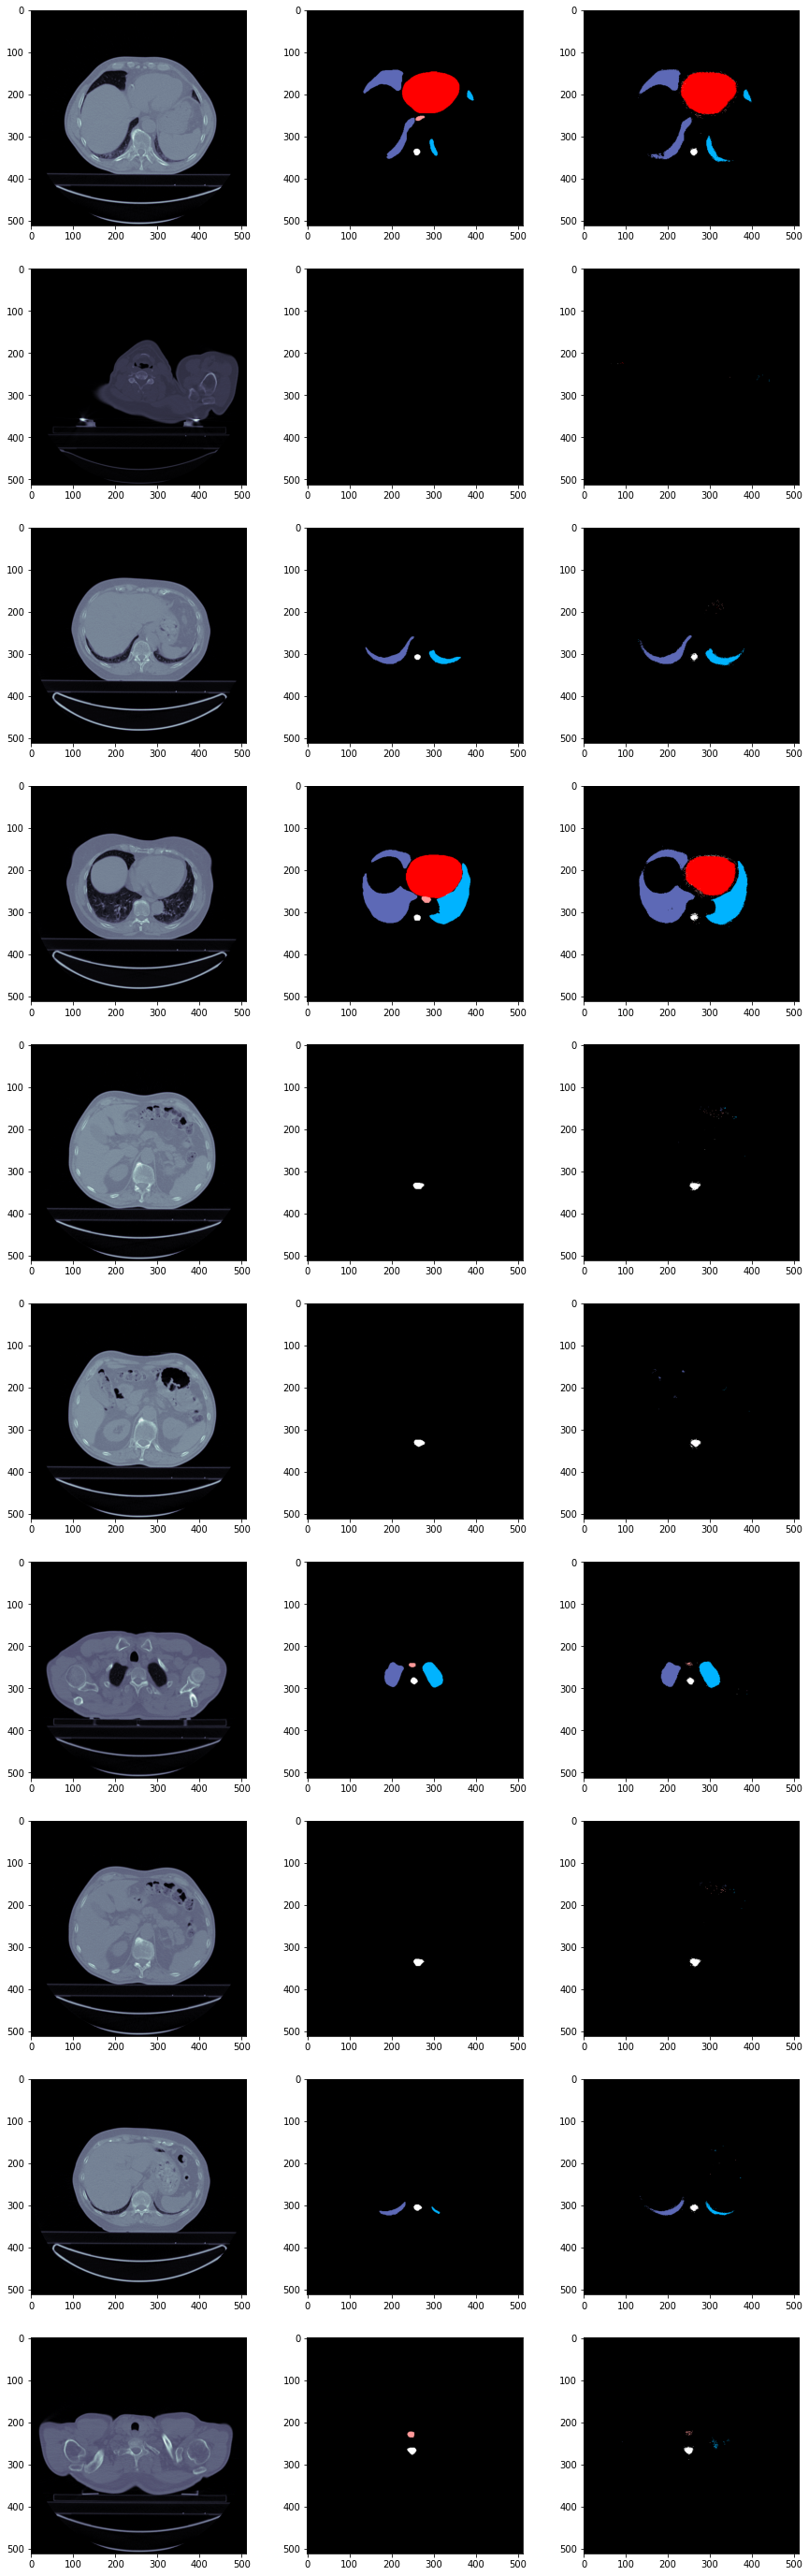

In [7]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [5]:
#Run TernausNet with BatchNormalization
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, path = "saved_models/TernausNet_norm",learning_rate = 2e-4, normalization = True)
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
60/60 [==============================] - 494s 8s/step - loss: 0.4367 - dice_coef_multilabel: 0.0303 - iou_multilabel: 0.0159 - val_loss: 0.3472 - val_dice_coef_multilabel: 0.0217 - val_iou_multilabel: 0.0113
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm/assets
Epoch 2/20
60/60 [==============================] - 472s 8s/step - loss: 0.2803 - dice_coef_multilabel: 0.0363 - iou_multilabel: 0.0192 - val_loss: 0.2271 - val_dice_coef_multilabel: 0.0210 - val_iou_multilabel: 0.0109
Epoch 3/20
60/60 [==============================] - 463s 8s/step - loss: 0.2163 - dice_coef_multilabel: 0.0436 - iou_multilabel: 0.0234 - val_loss: 0.2036 - val_dice_coef_multilabel: 0.0346 - val_iou_multilabel: 0.0184
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm/assets
Epoch 4/20
60/60 [==============================] - 461s 8s/step - loss: 0.1740 - dice_coef_multilabel: 0.0520 - iou_multilabel: 0.0283 - val_loss: 0.1667 - val_dice_coef_multilabel: 0.0420 - val_iou_m

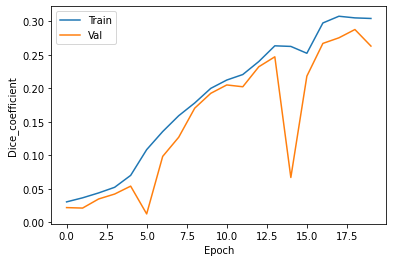

In [6]:
plot_dice(history)

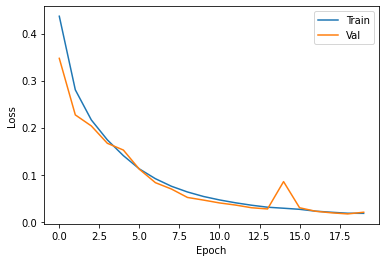

In [7]:
plot_loss(history)

In [11]:
preds = seg_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.35700873
TEST IoU:  0.25981623


In [ ]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [3]:
#NORM RUN 2

images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[200:400, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[200:400, :, :, :]
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

loaded_model = loaded_model = tf.keras.models.load_model('saved_models/TernausNet_norm', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, loaded_model = loaded_model, path = "saved_models/TernausNet_norm_2",learning_rate = 2e-4)
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
40/40 [==============================] - 465s 12s/step - loss: 0.0158 - dice_coef_multilabel: 0.2585 - iou_multilabel: 0.2007 - val_loss: 0.0129 - val_dice_coef_multilabel: 0.2549 - val_iou_multilabel: 0.2034
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm_2/assets
Epoch 2/20
40/40 [==============================] - 457s 11s/step - loss: 0.0125 - dice_coef_multilabel: 0.2698 - iou_multilabel: 0.2142 - val_loss: 0.0124 - val_dice_coef_multilabel: 0.2598 - val_iou_multilabel: 0.2128
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm_2/assets
Epoch 3/20
40/40 [==============================] - 421s 11s/step - loss: 0.0104 - dice_coef_multilabel: 0.2908 - iou_multilabel: 0.2363 - val_loss: 0.0084 - val_dice_coef_multilabel: 0.3024 - val_iou_multilabel: 0.2520
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm_2/assets
Epoch 4/20
40/40 [==============================] - 465s 12s/step - loss: 0.0095 - dice_coef_multilabel: 0.2954 - iou_mul

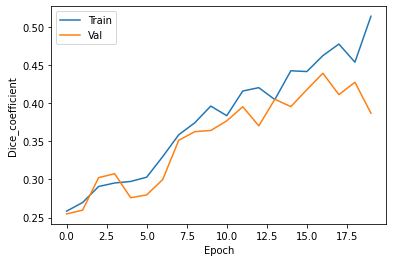

In [4]:
plot_dice(history)

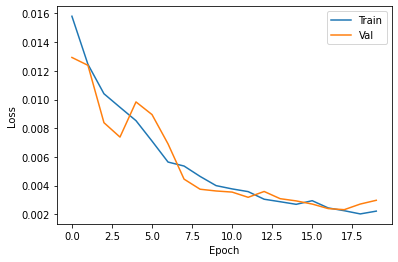

In [5]:
plot_loss(history)

In [6]:
preds = seg_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.6274438
TEST IoU:  0.5562404


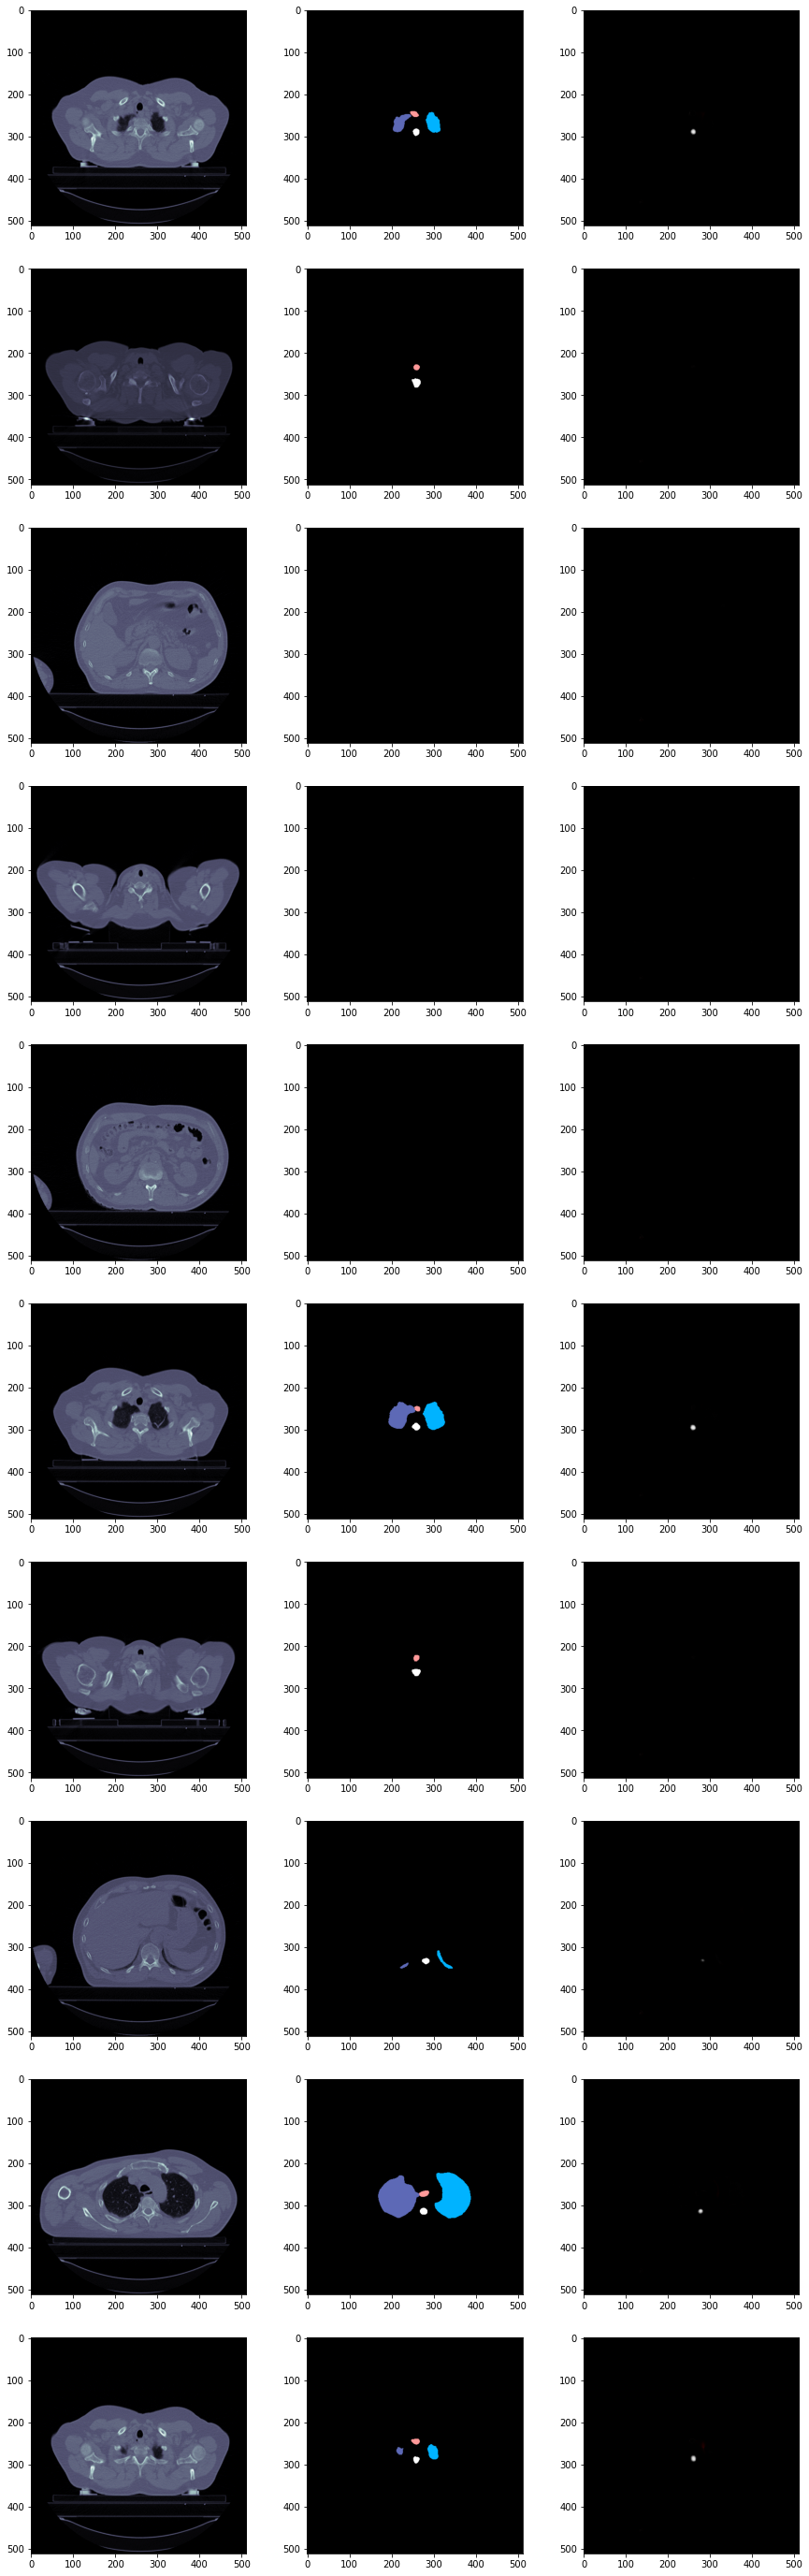

In [7]:
show_imgs(10, x_test[10:30], y_test[10:30], preds[10:30])

In [2]:
#NORM RUN 3

images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[400:600, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[400:600, :, :, :]
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

loaded_model = loaded_model = tf.keras.models.load_model('saved_models/TernausNet_norm_2', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, loaded_model = loaded_model, path = "saved_models/TernausNet_norm_3",learning_rate = 2e-4)
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
40/40 [==============================] - 337s 8s/step - loss: 0.0030 - dice_coef_multilabel: 0.3586 - iou_multilabel: 0.2985 - val_loss: 0.0027 - val_dice_coef_multilabel: 0.4144 - val_iou_multilabel: 0.3528
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm_3/assets
Epoch 2/20
40/40 [==============================] - 398s 10s/step - loss: 0.0024 - dice_coef_multilabel: 0.4145 - iou_multilabel: 0.3430 - val_loss: 0.0029 - val_dice_coef_multilabel: 0.3896 - val_iou_multilabel: 0.3375
Epoch 3/20
40/40 [==============================] - 461s 12s/step - loss: 0.0019 - dice_coef_multilabel: 0.3921 - iou_multilabel: 0.3286 - val_loss: 0.0035 - val_dice_coef_multilabel: 0.4246 - val_iou_multilabel: 0.3572
INFO:tensorflow:Assets written to: saved_models/TernausNet_norm_3/assets
Epoch 4/20
40/40 [==============================] - 349s 9s/step - loss: 0.0016 - dice_coef_multilabel: 0.4243 - iou_multilabel: 0.3585 - val_loss: 0.0034 - val_dice_coef_multilabel: 0.3958 - val

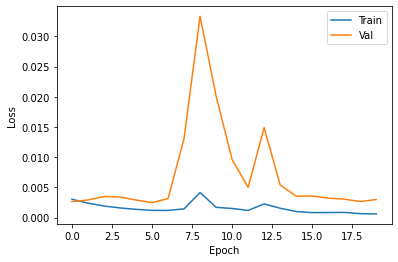

In [3]:
plot_loss(history)

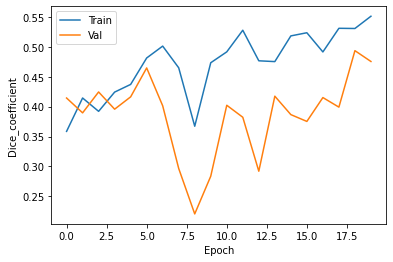

In [4]:
plot_dice(history)

In [5]:
preds = seg_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.74160385
TEST IoU:  0.65466297


In [2]:
#Avrg Pooling
images = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/imgs16.npy")[0:400, :, :, :]
labels = np.load("/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/masks16.npy")[0:400, :, :, :]
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5)


N = images.shape[0]
W = images.shape[1]
H = images.shape[2]
C = labels.shape[3]

seg_model = TernausNet(img_shape = x_train[0].shape, num_of_class = 5, path = "saved_models/TernausNet_avg",learning_rate = 2e-4, maxPooling = False)
history = seg_model.train(x_train, y_train, x_valid, y_valid, epoch = 20, batch_size = 2)

Epoch 1/20
80/80 [==============================] - 681s 9s/step - loss: 1.7049 - dice_coef_multilabel: 0.0338 - iou_multilabel: 0.0188 - val_loss: 0.6954 - val_dice_coef_multilabel: 0.0941 - val_iou_multilabel: 0.0560
INFO:tensorflow:Assets written to: saved_models/TernausNet_avg/assets
Epoch 2/20
80/80 [==============================] - 768s 10s/step - loss: 0.7079 - dice_coef_multilabel: 0.0989 - iou_multilabel: 0.0599 - val_loss: 0.3810 - val_dice_coef_multilabel: 0.1239 - val_iou_multilabel: 0.0771
INFO:tensorflow:Assets written to: saved_models/TernausNet_avg/assets
Epoch 3/20
80/80 [==============================] - 655s 8s/step - loss: 0.4610 - dice_coef_multilabel: 0.1186 - iou_multilabel: 0.0741 - val_loss: 0.2800 - val_dice_coef_multilabel: 0.1551 - val_iou_multilabel: 0.1012
INFO:tensorflow:Assets written to: saved_models/TernausNet_avg/assets
Epoch 4/20
80/80 [==============================] - 656s 8s/step - loss: 0.3846 - dice_coef_multilabel: 0.1077 - iou_multilabel: 0.0

In [3]:
preds = seg_model.predict(x_test)
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())

TEST DICE_COEF:  0.5127865
TEST IoU:  0.45371947
